**Equipo 6**             ** IAYRN**

1957058 	José Alejandro De la Fuente Rodríguez 	IMTC  	N1 	3301 	7mo

1987077	Pedro Alberto Almora Reyes	IMTC	N1	3301	6to


 **Librerias**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Preprocesamiento**


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/INPIA/Body Parts Dataset/Train',
    validation_split=0.2,
    subset="training",
    seed=123,
   image_size=(512,420))

Found 2092 files belonging to 10 classes.
Using 1674 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/INPIA/Body Parts Dataset/Train',
    validation_split=0.2,
    subset="validation",
    seed=123,
   image_size=(512,420))

Found 2092 files belonging to 10 classes.
Using 418 files for validation.


**Verificación**


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Belly', 'Ear', 'Elbow', 'Eye', 'Foot', 'Hand', 'Knee', 'Neck', 'Nose', 'Shoulders']


**Muestras del dataset de entrenamiento**

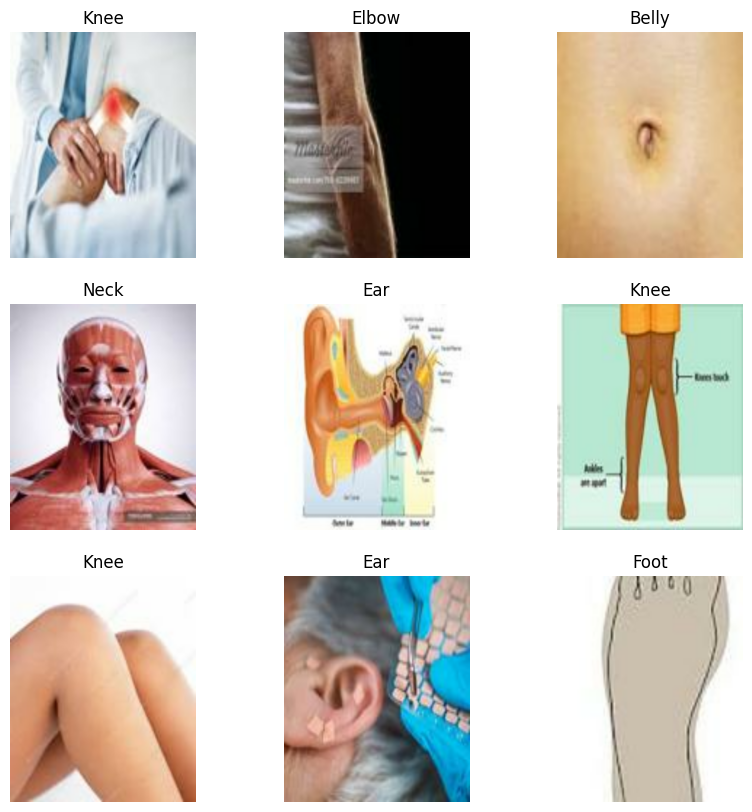

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

**Verificación de dimensiones de la imagen**

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 512, 420, 3)
(32,)


**Estructura y entrenamiento de Red Neuronal Artificial Convolusional (RNAC)**

In [ ]:
num_classes = len(class_names)

model = Sequential ([
    layers.Rescaling(1./255, input_shape=(512, 420, 3)),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
  ])

**Compilación**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Modelo**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 512, 420, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 512, 420, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 256, 210, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 210, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 105, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 105, 64)      1

**Entrenamiento**


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/INPIA/Body Parts Dataset/Train',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(512,420)
)
# Definir el número de épocas y el conjunto de entrenamiento y validación
epochs = 10

# Entrenar el modelo
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)



Found 2092 files belonging to 10 classes.
Using 418 files for validation.
Epoch 1/10
53/53 [==============================] - 248s 5s/step - loss: 3.2467 - accuracy: 0.1894 - val_loss: 2.2858 - val_accuracy: 0.2368
Epoch 2/10
53/53 [==============================] - 255s 5s/step - loss: 2.1765 - accuracy: 0.1404 - val_loss: 2.1443 - val_accuracy: 0.0957
Epoch 3/10
53/53 [==============================] - 248s 5s/step - loss: 1.8186 - accuracy: 0.1004 - val_loss: 2.2228 - val_accuracy: 0.1986
Epoch 4/10
53/53 [==============================] - 253s 5s/step - loss: 1.3655 - accuracy: 0.0926 - val_loss: 2.2267 - val_accuracy: 0.1172
Epoch 5/10
53/53 [==============================] - 244s 5s/step - loss: 0.7708 - accuracy: 0.1051 - val_loss: 2.6495 - val_accuracy: 0.1388
Epoch 6/10
53/53 [==============================] - 245s 5s/step - loss: 0.4540 - accuracy: 0.1010 - val_loss: 3.2522 - val_accuracy: 0.1388
Epoch 7/10
53/53 [==============================] - 251s 5s/step - loss: 0.2170 

**Grafica de perdida y exactitud para validacion de entrenamiento**

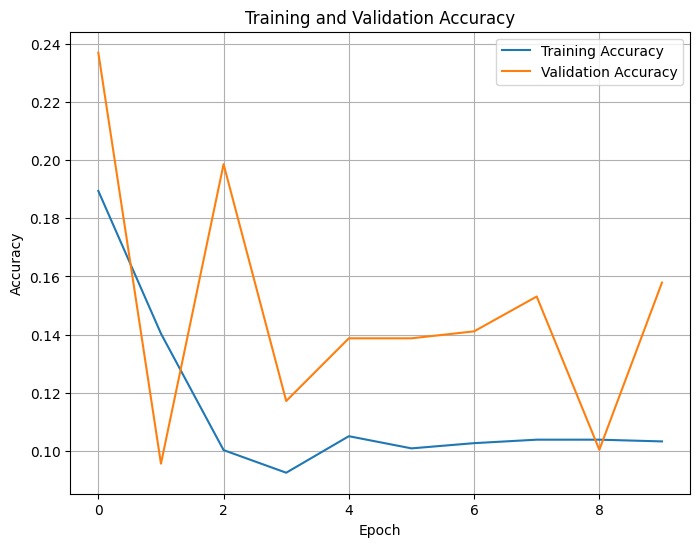

In [ ]:
# Graficar precisión de entrenamiento y validación durante el entrenamiento
plt.figure(figsize=(8, 6))

# Precisión de entrenamiento
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Precisión de validación
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# ... (código previo)

# Leer y preprocesar la imagen
image = Image.open(image_path).resize((512, 420))  # Cambia el tamaño intercambiando las dimensiones
image = np.array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

# Realizar predicciones con el modelo cargado
prediction = loaded_model.predict(image)
class_index = np.argmax(prediction)
class_names = ["Class1", "Class2", "Class3", "Class4", "Class5"]  # Reemplaza con tus nombres de clases reales
predicted_class = class_names[class_index]
print('La imagen es de la clase:', predicted_class)

1/1 [==============================] - 0s 333ms/step
La imagen es de la clase: Class4


**Imprimimos la predicción**

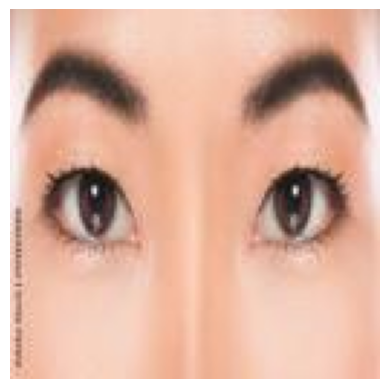

1/1 [==============================] - 0s 186ms/step
La imagen es de la clase: Eye


In [ ]:
image_path = '/content/drive/MyDrive/INPIA/Body Parts Dataset/Test/Eye/Eye_101.jpg'
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path).resize((512, 420))
image = np.array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = loaded_model.predict(image)

class_index = np.argmax(prediction)
class_names = ["Belly", "Ear", "Elbow", "Eye", "Foot", "Hand" , "Knee" , "Neck" , "Nose" , "Shoulders"]  # Reemplaza con tus nombres de clases reales
predicted_class = class_names[class_index]
print('La imagen es de la clase:', predicted_class)